<a href="https://colab.research.google.com/github/pjmaguire/find_me_music/blob/main/Find_Me_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & Functions

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import json
from ast import literal_eval
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score

In [ ]:
def data_report(data, figures=True):
  """
  Reports summary statistics and figures for a data frame.

  Inputs: data - a dataframe of uniform or mixed variables
  Outputs: None
  """
  #Libraries
  from pandas.api.types import is_string_dtype
  from pandas.api.types import is_numeric_dtype

  for col in data.columns:
    print("{}\n".format(col))
    #print(type(lc_data[col]))

    #Numerical Values
    if is_numeric_dtype(data[col]):
      print("Type:\tNumeric")
      clean = data[col].dropna()
      if len(clean) != 0:
        print("Range:\t{} - {}".format(min(clean), max(clean)))
        
        if figures:
          data[col].plot(kind='hist', title=col.capitalize())
          plt.show() 

    #String Values
    elif is_string_dtype(data[col]):
      print("Type:\tString")
      print("Values:") 
      print(data[col].unique())

      #Checks For URL Data
      #Note: Assumes that any URL means that the variable should not have a figure generated
      if not (any(data[col].str.contains("http"))):
        if figures:
          data[col].value_counts().plot(kind='barh', title=col.capitalize())
          plt.show()

    #Unknown
    else:
      print("Type:\tUnknown")


    print("NAs:\t{}".format(data[col].isna().sum()))

    print("\n_____________________\n")

# Data Loading

In [85]:
#Loads In Artist And Track Info
local = False
git = True

if local:
  artists = pd.read_csv("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/artists.csv")
  tracks = pd.read_csv("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/tracks.csv")
elif git:
  artists = pd.read_csv("https://media.githubusercontent.com/media/pjmaguire/find_me_music/main/Data/artists.csv")
  tracks = pd.read_csv("https://media.githubusercontent.com/media/pjmaguire/find_me_music/main/Data/tracks.csv")

#Loads In Related Artist Data
#with open("/Users/pmaguire/Dropbox/Stanford/Courses/CS68/Data/Spotify_Data/dict_artists.json") as file:
#  data = json.load(file)
#  related_artists = pd.DataFrame.from_dict(data, orient='index').T.set_index('index')   

# Variable Summary

**Artists**

In [51]:
artists.head(25)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


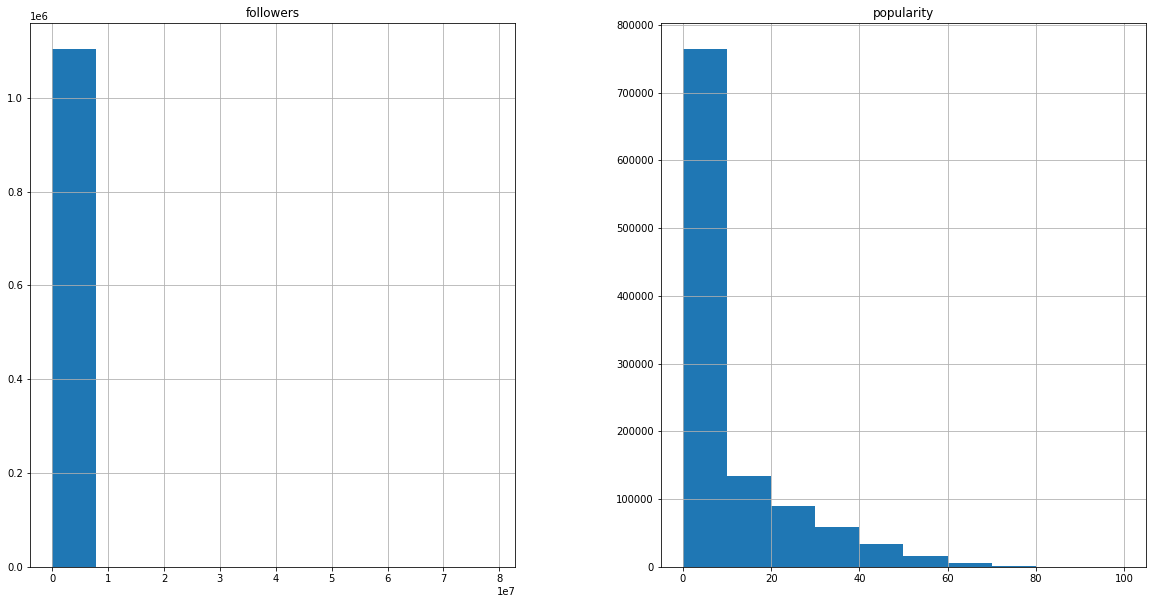

In [52]:
artists.hist(figsize=(20, 10))
plt.show()

In [53]:
data_report(artists, figures=False)

id

Type:	String
Values:
['0DheY5irMjBUeLybbCUEZ2' '0DlhY15l3wsrnlfGio2bjU'
 '0DmRESX2JknGPQyO15yxg7' ... '2vnT9YhKIvjVo9LnVjWmr2'
 '3ID0E5XCvnJIYZEq043ZoB' '5m0Y4WSYyai2BU752lCASy']
NAs:	0

_____________________

followers

Type:	Numeric
Range:	0.0 - 78900234.0
NAs:	13

_____________________

genres

Type:	String
Values:
['[]' "['carnaval cadiz']" "['classical harp', 'harp']" ...
 "['alternative dance', 'dance-punk', 'electrofox', 'new rave', 'swedish electropop']"
 "['emoviolence', 'metallic hardcore']"
 "['australian post-hardcore', 'metallic hardcore']"]
NAs:	0

_____________________

name

Type:	String
Values:
['Armid & Amir Zare Pashai feat. Sara Rouzbehani' 'ปูนา ภาวิณี' 'Sadaa'
 ... 'Jesse Giddings' 'The Boy Band Project' '10 Reasons']
NAs:	0

_____________________

popularity

Type:	Numeric
Range:	0 - 100
NAs:	0

_____________________



**Tracks**

In [54]:
tracks.head(25)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


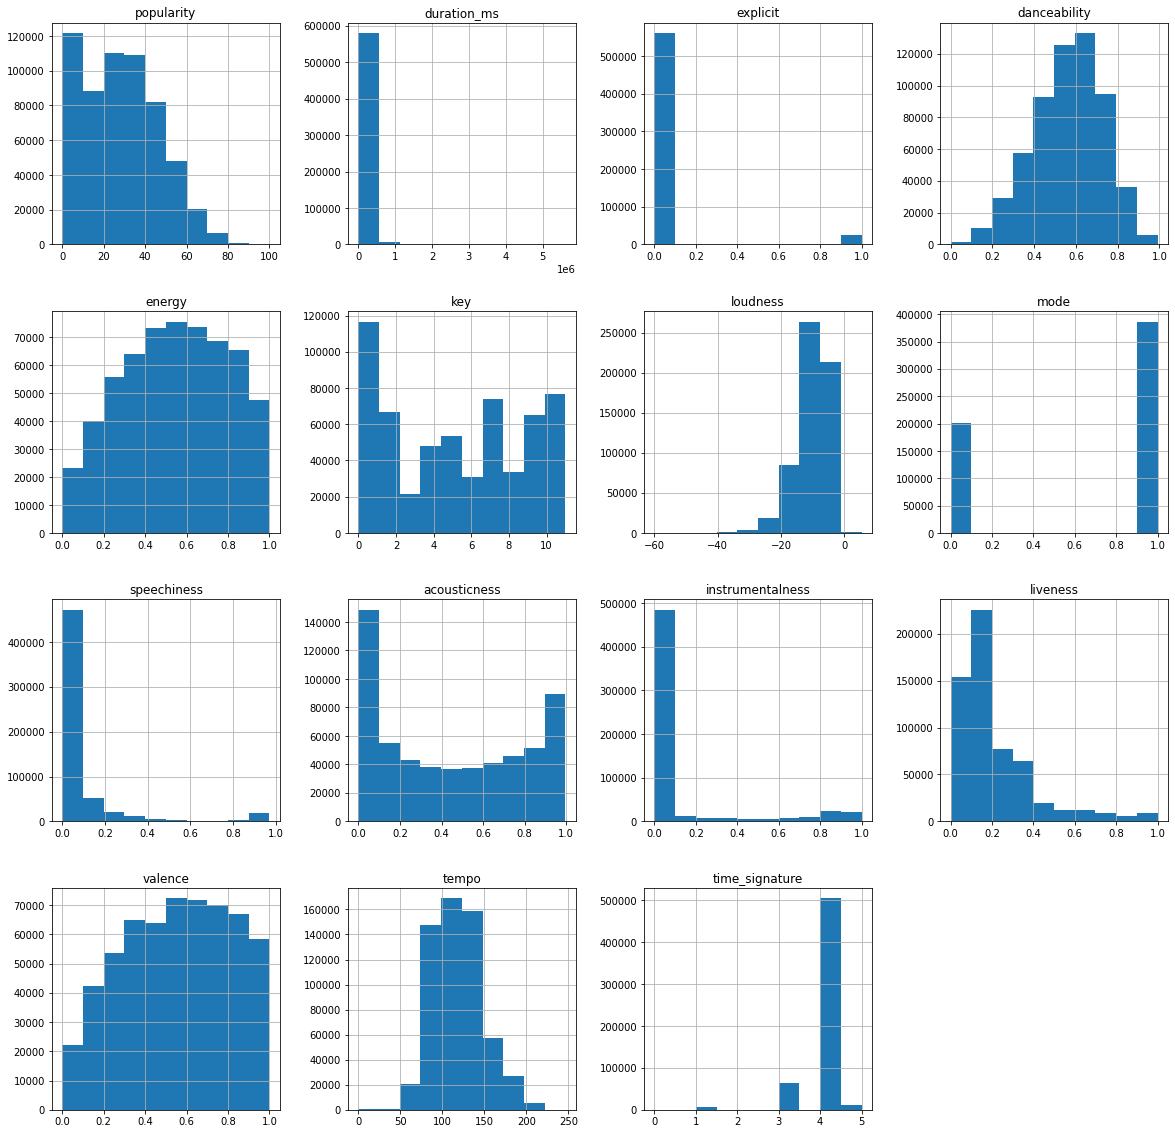

In [55]:
tracks.hist(figsize=(20, 20))
plt.show()

In [86]:
data_report(tracks, figures=False)

id

Type:	String
Values:
['35iwgR4jXetI318WEWsa1Q' '021ht4sdgPcrDgSk7JTbKY'
 '07A5yehtSnoedViJAZkNnc' ... '27Y1N4Q4U3EfDU5Ubw8ws2'
 '45XJsGpFTyzbzeWK8VzR8S' '5Ocn6dZ3BJFPWh4ylwFXtn']
NAs:	0

_____________________

name

Type:	String
Values:
['Carve' 'Capítulo 2.16 - Banquero Anarquista'
 'Vivo para Quererte - Remasterizado' ... 'blind'
 "What They'll Say About Us" 'A Day At A Time']
NAs:	71

_____________________

popularity

Type:	Numeric
Range:	0 - 100
NAs:	0

_____________________

duration_ms

Type:	Numeric
Range:	3344 - 5621218
NAs:	0

_____________________

explicit

Type:	Numeric
Range:	0 - 1
NAs:	0

_____________________

artists

Type:	String
Values:
["['Uli']" "['Fernando Pessoa']" "['Ignacio Corsini']" ... "['阿YueYue']"
 "['ROLE MODEL']" "['Gentle Bones', 'Clara Benin']"]
NAs:	0

_____________________

id_artists

Type:	String
Values:
["['45tIt06XoI0Iio4LBEVpls']" "['14jtPCOoNZwquk5wd9DxrY']"
 "['5LiOoJbxVSAMkBS2fUm3X2']" ... "['1QLBXKM5GCpyQQSVMNZqrZ']"
 "['1dy5WNgIKQU6ezkp

**Related Artists**

In [57]:
#related_artists.head(25)
#print(data.keys())

# Variable Assessment

In [ ]:
col = "name"

#na_idx = tracks.index[tracks[col].isna()]

tracks[col].isna()

#print(tracks.iloc[na_idx])

**release_date**

Note: Should convert it to year and month variables

In [ ]:
release_date

# Pre-Processing

**Track Names**

In [87]:
tracks["name"] = tracks["name"].fillna("")

**Artist Followers**

In [88]:
artists["followers"] = artists["followers"].fillna(0)

**Artist & ID_Artist**

Converts string values to list values

In [89]:
tracks["artists"] = tracks["artists"].apply(literal_eval)
tracks["id_artists"] = tracks["id_artists"].apply(literal_eval)

**Number Of Artists**

Creates a variable for the number of artists on a track

In [90]:
#Counts Number Of Artists
tracks["num_artists"] = [len(x) for x in tracks["artists"]]

#Sets Maximum Number Of Counted Artists To 6
#Note: Ignore if error is thrown
tracks["num_artists_bin"] = tracks['num_artists'].copy(deep=True)
tracks["num_artists_bin"].loc[tracks["num_artists"] > 6] = 6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Release Date**

Extracts various elements from the release date and builds several new categories. If no date or month is present, a NaN value reported for all day and month related variables.

In [91]:
#Fixes "Los Pincheira del Sur", Which Incorrectly Has A Stated Release Date Of January 1st 1900
tracks["release_date"].iloc[478627] = "2019-5-17"

#Converts String Date To Datetime
tracks["release_date_time"] = tracks["release_date"].copy(deep=True)
tracks["release_date_time"] = pd.to_datetime(tracks["release_date_time"])

#Creates Categories Of Interest
tracks["release_year"] = tracks["release_date_time"].dt.year
tracks["release_decade"] = tracks["release_date_time"].dt.year//10*10
tracks["release_month"] = tracks["release_date_time"].dt.month_name()
tracks["release_dayofweek"] = tracks["release_date_time"].dt.day_name()
tracks["release_quarter"] = tracks["release_date_time"].dt.quarter
tracks["release_endofmonth"] = tracks["release_date_time"].dt.is_month_end

#Identifies Elements That Lack Day & Month Data
date_time_gaps = ~tracks["release_date"].str.contains("-")

#Sets Appropriate Row Elements To NaN
tracks["release_month"].loc[date_time_gaps] = np.nan
tracks["release_decade"].loc[date_time_gaps] = np.nan
tracks["release_dayofweek"].loc[date_time_gaps] = np.nan
tracks["release_quarter"].loc[date_time_gaps] = np.nan
tracks["release_endofmonth"].loc[date_time_gaps] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Final Data Shape**

In [92]:
tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists,num_artists_bin,release_date_time,release_year,release_decade,release_month,release_dayofweek,release_quarter,release_endofmonth
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1,1,1922-02-22,1922,1920.0,February,Wednesday,1.0,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1,1,1922-06-01,1922,1920.0,June,Thursday,2.0,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1,1,1922-03-21,1922,1920.0,March,Tuesday,1.0,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1,1,1922-03-21,1922,1920.0,March,Tuesday,1.0,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,[Francis Marty],[2nuMRGzeJ5jJEKlfS7rZ0W],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,[Mistinguett],[4AxgXfD7ISvJSTObqm4aIE],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1,1,1922-01-01,1922,NaN,NaN,NaN,NaN,NaN
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1,1,1922-03-29,1922,1920.0,March,Wednesday,1.0,0.0


# Release Date Prediction

Known Vs Unknown Identification

In [93]:
#Identifies Elements That Have Day & Month Data
date_time_known = tracks["release_date"].str.contains("-")

#Identifies Elements That Lack Day & Month Data
date_time_gaps = ~tracks["release_date"].str.contains("-")

## Build Input Variables

In [94]:
categorical_cols = [
]

categorical_cols

[]

In [95]:
categorical_numerical_columns = [
  "key",
  "mode",
  "time_signature",
  "release_year",
  "release_decade",
  "explicit",
  "num_artists_bin"
]
categorical_numerical_columns

['key',
 'mode',
 'time_signature',
 'release_year',
 'release_decade',
 'explicit',
 'num_artists_bin']

In [105]:
continuous_numerical_columns = [
   "loudness",
   "tempo",
   "popularity",
   "duration_ms"
]
continuous_numerical_columns

['loudness', 'tempo', 'popularity', 'duration_ms']

In [97]:
continuous_numerical_columns_standardized = [
   "danceability",
   "energy",  
   "speechiness",
   "acousticness",
   "valence",
   "liveness",
   "instrumentalness"                                         
]
continuous_numerical_columns_standardized

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'valence',
 'liveness',
 'instrumentalness']

In [ ]:
#name 	
#artists

Creates Collection Of Categories Of Interest

In [103]:
song_data = tracks[categorical_cols + categorical_numerical_columns + continuous_numerical_columns + continuous_numerical_columns_standardized]
song_data.head()

,key,mode,time_signature,release_year,release_decade,explicit,num_artists_bin,tempo,popularity,duration_ms,danceability,energy,speechiness,acousticness,valence,liveness,instrumentalness
0,0,1,3,1922,1920.0,0,1,104.851,6,126903,0.645,0.4450,0.4510,0.674,0.127,0.151,0.7440
1,0,1,1,1922,1920.0,0,1,102.009,0,98200,0.695,0.2630,0.9570,0.797,0.655,0.148,0.0000
2,1,1,5,1922,1920.0,0,1,130.418,0,181640,0.434,0.1770,0.0512,0.994,0.457,0.212,0.0218
3,7,1,3,1922,1920.0,0,1,169.980,0,176907,0.321,0.0946,0.0504,0.995,0.397,0.104,0.9180
4,3,0,4,1922,NaN,0,1,103.220,0,163080,0.402,0.1580,0.0390,0.989,0.196,0.311,0.1300


In [110]:
#tracks["loudness"] = abs(tracks["loudness"])
#tracks["loudness"].plot.hist()

tracks["loudness"].apply(int)

#for x in continuous_numerical_columns:
#    tracks[x] = tracks[x].apply(literal_eval)

0        -13
1        -22
2        -21
3        -27
4        -16
          ..
586667    -7
586668    -5
586669   -12
586670    -6
586671    -7
Name: loudness, Length: 586672, dtype: int64

Standardizes Continuous Numerical Ranges Using Z-Score Normalization

In [111]:
scaler = MinMaxScaler()
scaler.fit(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns] = scaler.transform(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns]

ValueError: ignored

Creates Dummy Variables

In [ ]:
song_data = pd.get_dummies(data = song_data, columns=(categorical_numerical_columns + categorical_cols), drop_first=False)
song_data

Creates Final Processed Dataset

In [ ]:
X = song_data
X = X.reset_index()

## Month

### Splitting Data

Creates Training, Validation, And Test Sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.33)

print('Train fraction: {}'.format((X_train.shape[0]) / X.shape[0]))
print('Validation fraction: {}'.format((X_valid.shape[0]  / X.shape[0])))
print('Test fraction: {}'.format((X_test.shape[0]  / X.shape[0])))

Training Set Snapshot

In [ ]:
X_train.head()

### Training

### Variable Back-Filling

## Day

### Splitting Data

Correct Using A-Prior Information

## Build Input Variables

In [ ]:
#Idenifies Dates After 2015
#Note: July 15th 2015 standardized and shifted the Global Release Day to Fridays
date_time_gaps_global_release = tracks["release_year"].loc[date_time_gaps] > 2015



In [ ]:
#categorical_cols = [
#   "release_month",
#   "release_dayofweek"
#]

categorical_cols

In [ ]:
categorical_numerical_columns = [
  "key",
  "mode",
  "time_signature",
  "release_year",
  "release_decade",
  "release_quarter",
  "release_endofmonth"
]
categorical_numerical_columns

In [ ]:
continuous_numerical_columns = [
   "danceability",
   "energy",
   "loudness",
   "speechiness",
   "acousticness",
   "tempo",
   "valence",
   "liveness",
   "instrumentalness"
]
continuous_numerical_columns

In [ ]:
name 	
popularity 	
duration_ms 	
explicit 	
artists

Creates Collection Of Categories Of Interest

In [ ]:
song_data = tracks[categorical_cols + categorical_numerical_columns + continuous_numerical_columns + continuous_numerical_columns_standardized]
song_data.head()

Standardizes Continuous Numerical Ranges Using Z-Score Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns] = scaler.transform(song_data.iloc[continuous_numerical_columns])
song_data.iloc[continuous_numerical_columns]

Creates Dummy Variables

In [ ]:
song_data = pd.get_dummies(data = song_data, columns=(categorical_numerical_columns + categorical_cols), drop_first=False)
song_data

Creates Final Processed Dataset

In [ ]:
X = song_data
X = X.reset_index()